# MA 506 Probability and Statistical Inference
# Lecture 4: Probability

Some basic concepts:

1. **Probability (P)**: Probability is a measure of how likely can an event occur. The sum of the probabilities of all possible events always sum to 1.
2. **Random Experiment**: A Random Experiment is an experiment, trial, or observation that can be repeated numerous times under the same conditions. The outcome of an individual random experiment must be independent and identically distributed. It must in no way be affected by any previous outcome and cannot be predicted with certainty.
3. **Sample Space ($\Omega$)**: In probability theory, the sample space (also called sample
description space or possibility space) of an experiment or random trial is the set of all
possible outcomes or results of that experiment. For example for a single coin toss: $\Omega = \{H,T \}, \text{ and } P(H)+P(T) = 1$
4. **Events**: Subset of a sample space. Referring to the experiment of tossing the coin, the possible events include $E = \{H\}$ and $E = \{T\}$. Events can be of the following types (For some events A and B)$\\$
$\hspace{0.01in}$- **Dependent events**: 
$$ P(A\ and\ B\ both\ occur) = P(A\ occur|\ B\ has\ occured)P(B\ occur)$$

$\hspace{0.3in}$- **Independent events**: 
$$ P(A\ and\ B\ both\ occur) = P(A\ occur)P(B\ occur)$$

$\hspace{0.3in}$- **Mutually exclusive events**: 
$$ P(A\ and\ B\ both\ occur) = 0$$

5. **Random variable**: It is a real valued function of the outcome of an experiment. For example for the coin toss experiment we can define a random variable as follows

$$X(\omega): \Omega \to \mathbb{R}$$
$$\begin{equation}
X(\omega)=
    \begin{cases}
        1 & \omega = \{H\}\\
        0 & \omega = \{T\}\\
    \end{cases}
\end{equation}$$

In [1]:
import numpy as np
from matplotlib.pyplot import *

# Probability basics

Here we will use simulations to understand different probability concepts

1. Estimating probabilies of an event from simulations
2. Compute Conditional probabilites
3. Bayes Theorem

## 1 Coin toss experiment

Suppose you are doing an experiment where you count the number of heads when you toss a coin 100 times. For generating this data I am using a probability of heads as 0.5.

In [2]:
X = np.random.binomial(100,p=0.7) 
X

69

Now, suppose you repeat this experiment 1000 times

In [10]:
X = np.random.binomial(100,p=0.5,size=1000)
len(X)

1000

Using these 1000 observations we want to estimate what was the probability of Heads turning up (beacause in reality we wont know if p was 0.4 or 0.5 or something else..)

### 1.1 Point estimate of heads

In [11]:
## Estimate of probability of heads from the experiment
prob = np.mean(X/100)   ### because X/100 is the proportion of head obtained in each experiment
prob

0.50094

Question: How good it is ?

In [12]:
hist(X,density=True)
show()

There is a whole distribution that is telling us something. However the mean is just giving us a point estimate. Can we do better ?

## 2 Conditional probabilites

Q: Find the probability that number of heads occuring is > 55 ?

#### $P(Number of heads > 55)$ = $\frac{Number\ of\ experiments\ with\ heads\ greater\ than\ 55}{Total\ number\ of\
experiments}$

In [13]:
p1 = sum(X>55)/1000
p1

0.132

Q:Find the probability of number of heads > 55 given number of heads is greater than 50 ?

P(Number of heads > 55 | Number of heads > 50) = $\frac{P(Number\ of\ heads > 55\ and\ Number\ of\ heads > 50)}{P(Number\ of\ heads > 50)}$ = $\frac{P(Number\ of\ heads > 55)}{P(Number\ of\ heads > 50)}$

In [14]:
p1 = sum(X>55)/1000
p2 = sum(X>50)/1000
p2 = p1/p2
p2

0.2778947368421053

## 3 Bayes theorem

Suppose in a city:

1% of people have a certain genetic defect.

90% of tests for the gene detect the defect (true positives).

9.6% of tests for healthy people detect the defect (false positives).

If a person gets a positive test result, what are the odds they actually have the genetic defect?

### 3.1 Generating the population

In [15]:
### Assuming 10000 people
n = 10000
defect = np.random.binomial(n,p=0.01)
healthy = n - defect

### 3.2 Testing the population

In [16]:
## Number of people who have the defect and tested positive
d_test_pos = np.random.binomial(defect, p = 0.9)
## Number of people who are healthy and tested positive
h_test_pos = np.random.binomial(healthy, p = 0.096)

$$P(Have\ genetic\ defect\ |\ +\ test\ result) = \frac{P(Have\ genetic\ defect\ and\ tested\ positive)}{P(tested\ positive)}$$

In [17]:
p1 = d_test_pos/n
p2 = (d_test_pos+h_test_pos)/n
Prob = p1/p2
Prob

0.07744433688286544

### 3.3 Computing by bayes theorem

$$P(Have\ genetic\ defect\ |\ +\ test\ result) = \frac{P(+\ test\ result\ |\ Have\ genetic\ defect)\ \cdot\ P(Have\ genetic\ defect)}{P(+\ test\ result)}$$

P(+ test result) = P(+ test result | defect)P(defect) + P(+ test result | healthy)P(healthy)

Now we have all of the information we need to put into the equation:
        
      P(Have genetic defect | + test result) = (.9 * .01) / (.9 * .01 + .096 * .99) = 0.0865

### <mark style="background-color: #FFFF00">Exercise</mark>

It is know that

1. Probability of having cancer: 0.5%
2. Porbability of testing positive if you have cancer: 85%
3. Probability of testing negative if you don't have cancer: 92.5%


Find: 

$$
 P(Having\ cancer\ |\ Tested\ positive) = ?
$$

using simulation and then verify it using hand computation

## 4 Widely used probability distributions

### 4.1 Gaussian/Normal distribution

For a given value of mean ($\mu$) and variance ($\sigma^2$), the probability density function of a normal random variable x is given as:

$$p(x|\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$$

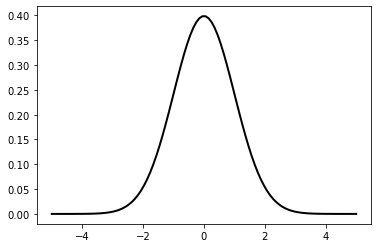

In [19]:
from scipy.stats import norm
x = np.linspace(-5,5, 100)
rv = norm(0,1)
plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
show()

#### Getting samples from population

In [20]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)

In [21]:
hist(s,bins = 100,label = 'histogram')
show()

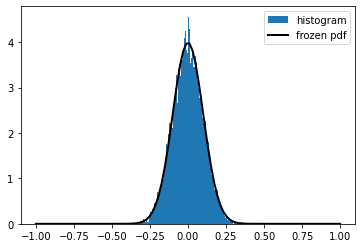

In [22]:
hist(s,bins = 100,density=True,label = 'histogram')
rv = norm(mu,sigma)
x = np.linspace(-1,1, 100)
plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
legend()
show()

#### Getting population parameters from samples

In [23]:
np.mean(s)

-0.0019249511629223228

In [24]:
np.std(s)

0.10008758159864133

### <mark style="background-color: #FFFF00">Exercise</mark> 

For continuous uniform distribution: C[0,1]

1. Plot the pdf
2. Sample 10000 samples from the distribution
3. Plot the histogram with pdf over it